# GBM - GRADIENT BOOSTING MACHINES

In [4]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df = pd.read_csv("verisetleri\diabetes.csv")
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [6]:
 # MODEL & TAHMİN

In [11]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [12]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [13]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        d:\btkakademi_turkcellgy\.tgy_veribilimi\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
  

In [14]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

In [15]:
# MODEL TUNNING

In [16]:
gbm = GradientBoostingClassifier()

In [17]:
gbm_params = {"learning_rate":[0.1, 0.01,0.0001, 0.05], "n_estimators":[100, 300, 500, 1000], "max_depth":[2,3,5,8]}

In [18]:
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv=10, n_jobs=-1,verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  3.6min finished


In [19]:
gbm_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500}

In [20]:
# FİNAL MODEL

In [25]:
gbm_tuned = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500).fit(X_train, y_train)

In [26]:
y_pred = gbm_tuned.predict(X_test)

In [27]:
accuracy_score(y_test, y_pred)

0.7316017316017316

### DEĞİŞKEN ÖNEM DÜZEYLERİ

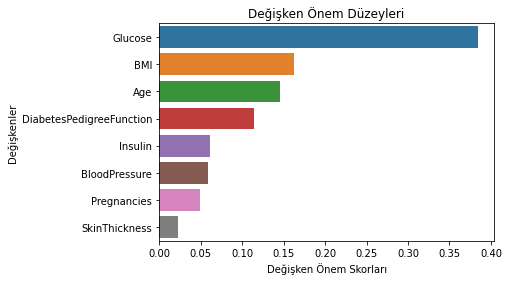

In [29]:
feature_imp = pd.Series(gbm_tuned.feature_importances_, index=X_train.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()